In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [2]:
def print_title(title):
    print(f'\n{'-'*60}\n\033[1m{title}\033[0m')
def print_section(title):
    print(f'{'-'*60}\n{title}\n{'-'*60}')

# (1) Loading and Preprocessing
#### loding the California Housing dataset using the fetch_California_Housing function from sklearn

In [4]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [5]:
x = data.data
y = data.target
feature = data.feature_names

In [6]:
print_section('This data from sklearndataset contains the average house value as target variable\nand the following indepentend variables (features): \033[1maverage income,\nhousing average age, average rooms, average bedrooms, population,\naverage occupation, latitude,\033[0m and \033[1mlongitude\033[0m in that order.')

------------------------------------------------------------
This data from sklearndataset contains the average house value as target variable
and the following indepentend variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.
------------------------------------------------------------


#### Converging the dataset into a pandas DataFrame for easier handling.

In [8]:
ch = pd.DataFrame(x,columns = feature)
ch['MedHouseVal'] = y

In [9]:
#data frame basic exploratory data analysis
print_title("DataFrame Info")
print_section(ch.info())
print_title("DataFrame null values sum")
print_section(ch.isnull().sum())
print_title("DataFrame Description")
print_section(ch.describe())


------------------------------------------------------------
DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
------------------------------------------------------------
None
------------------------------------------------------------

------------------------------------------------------------
DataFrame null values sum
------------------------------------------------------------
MedInc         0
HouseAge       0
Ave

In [10]:
#duplicate row removing 
print_section(f"Total Row Befor removing duplicated row: \033[1m{len(ch)}\033[0m")
ch = ch.drop_duplicates()
print_section(f"Total Row After removing duplicated row: \033[1m{len(ch)}\033[0m\nSice Bhoth values are same the duplicates rows not avilable")

------------------------------------------------------------
Total Row Befor removing duplicated row: 20640
------------------------------------------------------------
------------------------------------------------------------
Total Row After removing duplicated row: 20640
Sice Bhoth values are same the duplicates rows not avilable
------------------------------------------------------------


In [11]:
# mean and standerd deviation of given dataframe
ch_mean = ch.mean(axis = 0,numeric_only=True)
print_section("\033[1mMean of DataFrame\033[0m")
print_section(ch_mean)
ch_mean = ch.std(axis = 0,numeric_only=True)
print_section("\033[1mStanderd deviation of DataFrame\033[0m")
print_section(ch_mean)

------------------------------------------------------------
Mean of DataFrame
------------------------------------------------------------
------------------------------------------------------------
MedInc            3.870671
HouseAge         28.639486
AveRooms          5.429000
AveBedrms         1.096675
Population     1425.476744
AveOccup          3.070655
Latitude         35.631861
Longitude      -119.569704
MedHouseVal       2.068558
dtype: float64
------------------------------------------------------------
------------------------------------------------------------
Standerd deviation of DataFrame
------------------------------------------------------------
------------------------------------------------------------
MedInc            1.899822
HouseAge         12.585558
AveRooms          2.474173
AveBedrms         0.473911
Population     1132.462122
AveOccup         10.386050
Latitude          2.135952
Longitude         2.003532
MedHouseVal       1.153956
dtype: float64
-------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


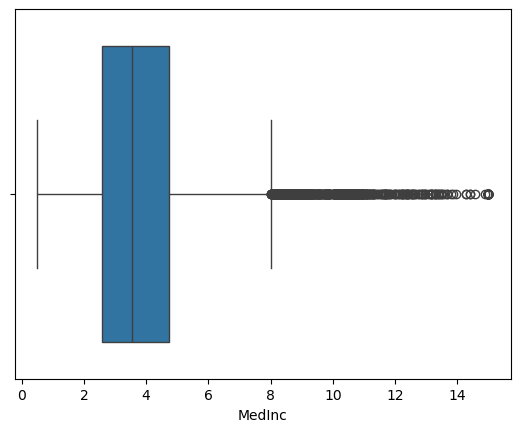

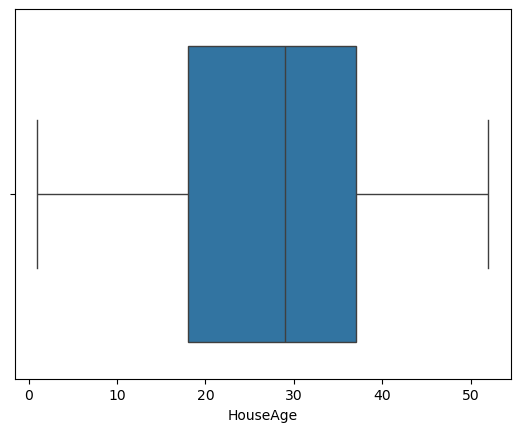

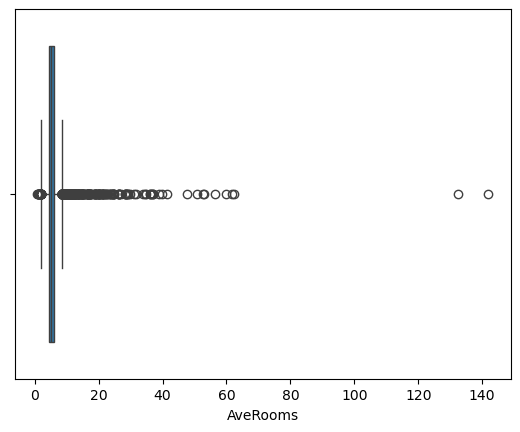

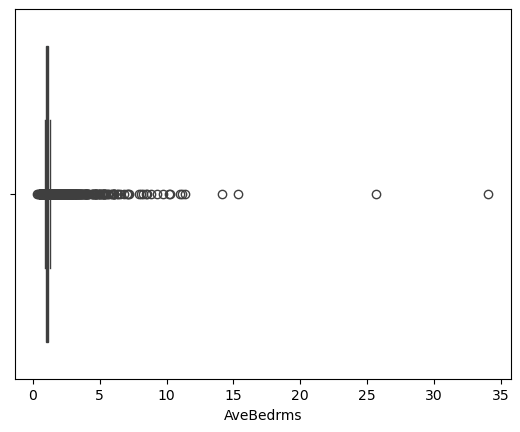

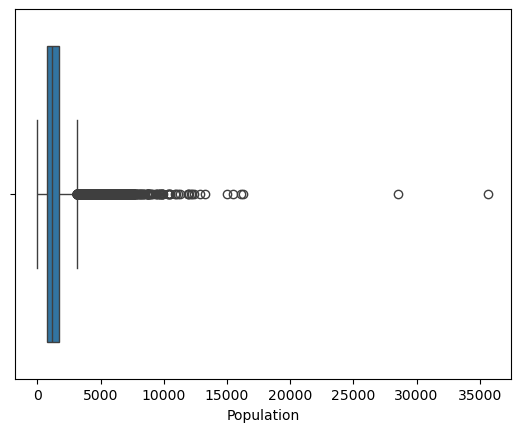

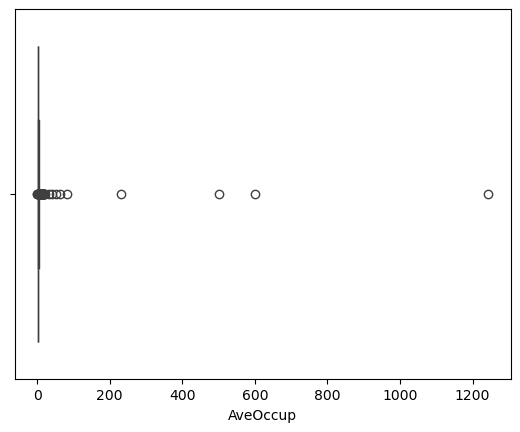

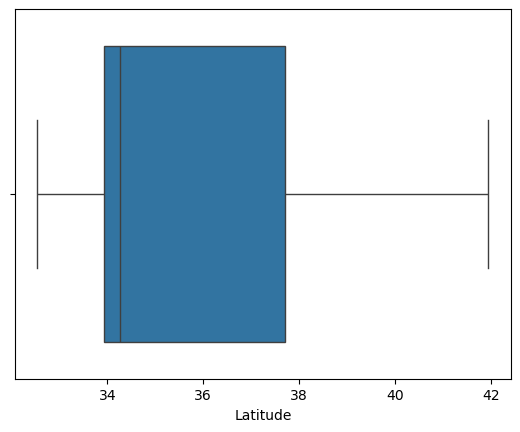

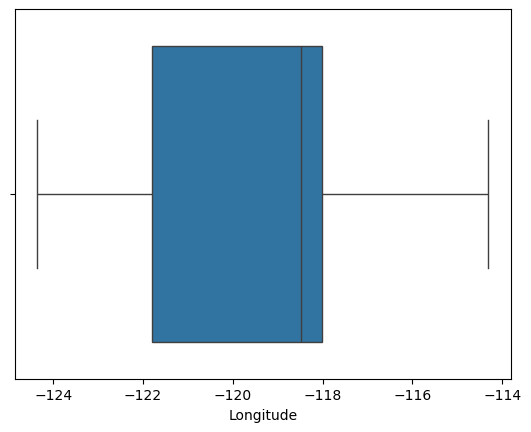

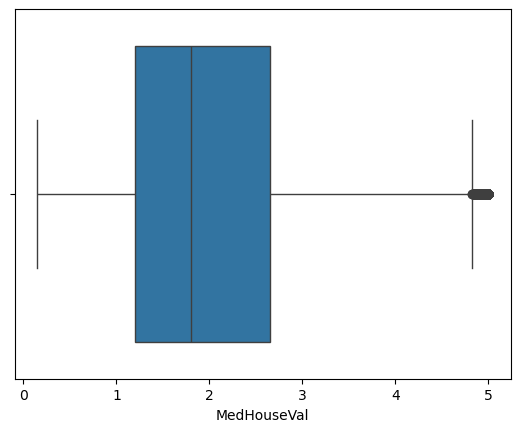

In [12]:
### Creating new datafame for outlier visualisation 
ch_col = ch.select_dtypes(include='number')
print(ch_col.info())
### syntex to visualise the df to detect outliers for each columns 
for i in ch_col.columns:
    sns.boxplot(data=ch,x=i)
    plt.show()

In [13]:
# creating custom definition to remove outliers using IQR method
def outliers(df):
    for col in df.select_dtypes(include=['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5*IQR)
        upper = Q3 + (1.5*IQR)

        # Capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df

In [14]:
#calling custom definition to remove outliers of dataframe 'ch'
new_ch = outliers(ch)
new_ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


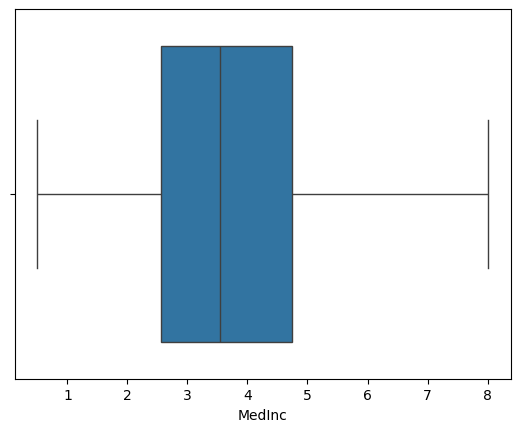

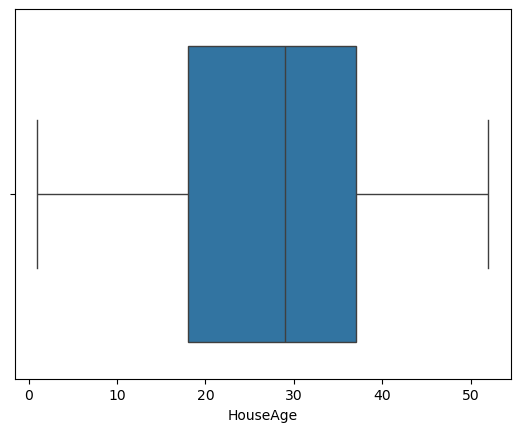

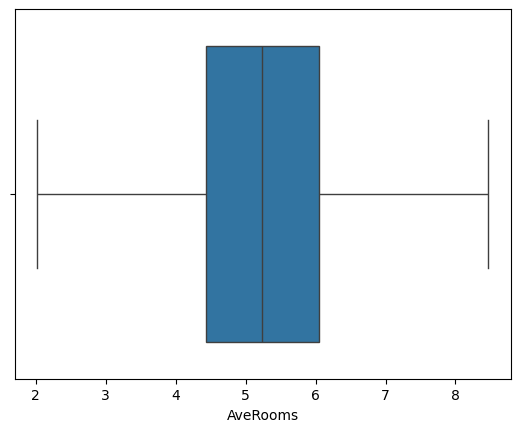

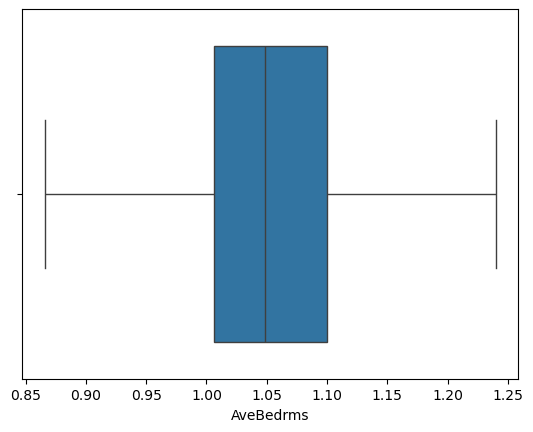

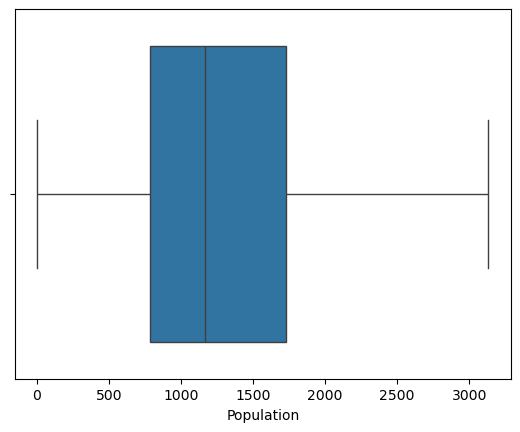

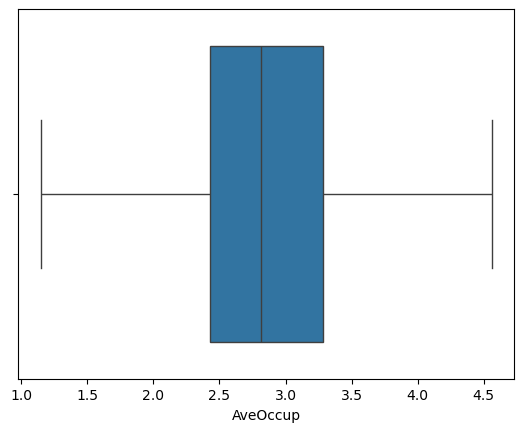

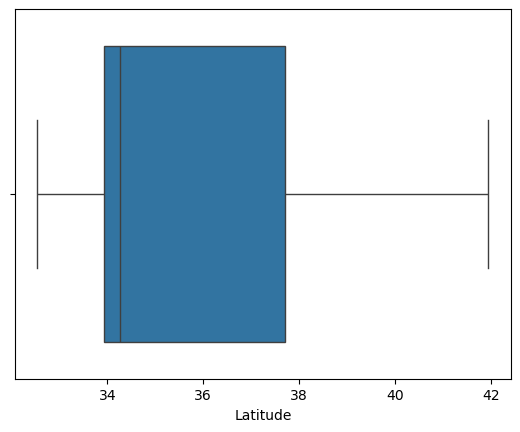

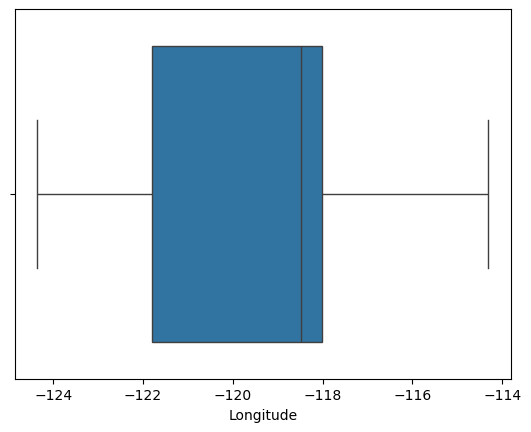

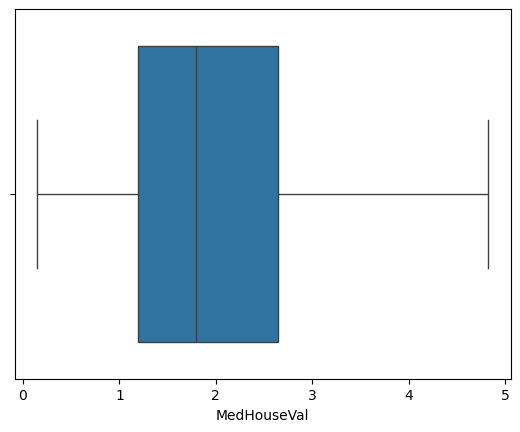

In [15]:
### syntex to visualise the df to detect outliers for each columns after removing outliers using IQR method
for i in new_ch.columns:
    sns.boxplot(data=new_ch,x=i)
    plt.show()

In [16]:
#minmax scaling
numerical_col = new_ch.select_dtypes(include=['number'])
scl_Minmax = MinMaxScaler()
scl_dta_mimax = scl_Minmax.fit_transform(numerical_col)
ch_scl_minmax = pd.DataFrame(scl_dta_mimax, columns=numerical_col.columns, index=new_ch.index)
New_ch_minmax = pd.concat([new_ch.drop(columns=numerical_col.columns), ch_scl_minmax], axis=1)
print_title("New df after MinMax Scaling")
print_section(f'\n{New_ch_minmax}')


------------------------------------------------------------
New df after MinMax Scaling
------------------------------------------------------------

         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0      1.000000  0.784314  0.769532   0.422435    0.101950  0.411895   
1      1.000000  0.392157  0.653814   0.283508    0.766379  0.281190   
2      0.899426  1.000000  0.971808   0.555229    0.157558  0.484240   
3      0.684562  1.000000  0.588542   0.554193    0.177373  0.409663   
4      0.445394  1.000000  0.660596   0.575654    0.179610  0.302194   
...         ...       ...       ...        ...         ...       ...   
20635  0.141140  0.470588  0.468806   0.715445    0.269096  0.413376   
20636  0.273774  0.333333  0.634564   1.000000    0.112816  0.578240   
20637  0.159734  0.313725  0.493639   0.680021    0.320869  0.344471   
20638  0.181988  0.333333  0.512869   0.818676    0.235858  0.285110   
20639  0.251387  0.294118  0.501267   0.792844    0.4423

In [17]:
skewness = New_ch_minmax.skew()
print_section("\033[1mSkewness of Features in dataframe after Scaling\033[0m")
print_section(skewness)

------------------------------------------------------------
Skewness of Features in dataframe after Scaling
------------------------------------------------------------
------------------------------------------------------------
MedInc         0.735618
HouseAge       0.060331
AveRooms       0.348567
AveBedrms      0.462645
Population     0.842247
AveOccup       0.510453
Latitude       0.465953
Longitude     -0.297801
MedHouseVal    0.912330
dtype: float64
------------------------------------------------------------


------------------------------------------------------------
Histplot of dataframe after Scaling
------------------------------------------------------------


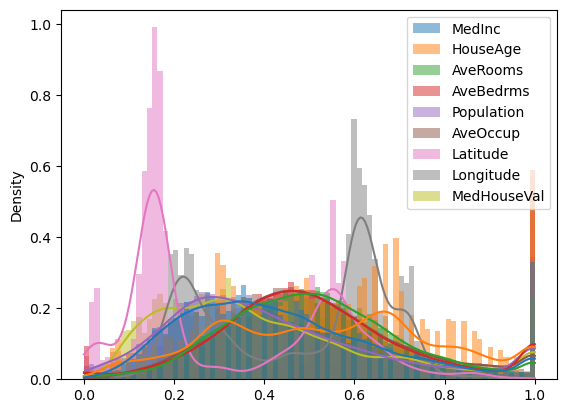

In [18]:
sns.histplot(New_ch_minmax,kde=True,stat='density',linewidth=0)
print_section("\033[1mHistplot of dataframe after Scaling\033[0m")
plt.show()

In [19]:
corr_ch = New_ch_minmax.corr()

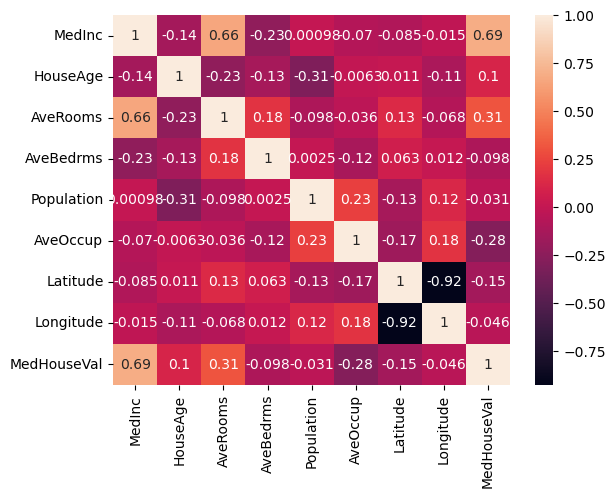

------------------------------------------------------------
Skewness of Features in dataframe after Scaling
------------------------------------------------------------
------------------------------------------------------------
MedInc         0.735618
HouseAge       0.060331
AveRooms       0.348567
AveBedrms      0.462645
Population     0.842247
AveOccup       0.510453
Latitude       0.465953
Longitude     -0.297801
MedHouseVal    0.912330
dtype: float64
------------------------------------------------------------


In [20]:
sns.heatmap(corr_ch,annot=True)
plt.show()
skewness = New_ch_minmax.skew()
print_section("\033[1mSkewness of Features in dataframe after Scaling\033[0m")
print_section(skewness)

##### The Histplot of after scaling and before scaling gives a clear visual of above steps of data preprocessing is necessary for the dataset and Highly skewd features have good co-relation with the targen variable 'MedHouseVal' and less co-related features has good skewness. Therefore, the dataset 'New_ch_minmax' can be concluded to be fit for the next process

# (2) Regression Algoritham Implementaion

In [23]:
Cal_H=New_ch_minmax #renaming for futher Analysis
# Feature selection
X=Cal_H[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude',]]
Y=Cal_H['MedHouseVal']

In [24]:
#depentent veriable
Y

0        0.936218
1        0.734897
2        0.721205
3        0.698099
4        0.700025
           ...   
20635    0.135000
20636    0.132861
20637    0.165380
20638    0.149121
20639    0.159176
Name: MedHouseVal, Length: 20640, dtype: float64

#### Linear Regression

In [26]:
#syntex for traning and testing for linear regression
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)  

In [27]:
#syntes for linear regression modeling
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
#syntex for model prediction 
y_pred = model.predict(X_test)
print(y_pred)

[0.02279585 0.38853306 0.69908632 ... 0.83300977 0.23446578 0.32665012]


In [29]:
#sytex for model score
Score_LinearRegression = model.score(X_test,y_test)

#### Decidion Tree Regressor

In [31]:
#syntex for traning and testing for Decidion Tree Regressor
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
#syntes for Decidion Tree Regressor modeling
model1 = DecisionTreeRegressor(random_state=42)  
model1.fit(X1_train, y1_train)

DecisionTreeRegressor(random_state=42)

In [33]:
#syntex for model prediction 
y1_pred = model1.predict(X1_test)
print(y1_pred)

[0.08729102 0.22528446 1.         ... 1.         0.10911324 0.27042651]


In [34]:
#sytex for model score
Score_DecisionTreeRegressor = model1.score(X1_test,y1_test)

#### Random Forest Regressor

In [36]:
#syntex for traning and testing for Random Forest Regressor
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [37]:
#syntes for Random Forest Regressor modeling
model2 = RandomForestRegressor(random_state=42) 
model2.fit(X2_train, y2_train)

RandomForestRegressor(random_state=42)

In [38]:
#syntex for model prediction 
y2_pred = model2.predict(X2_test)
print(y2_pred)

[0.0779203  0.12537293 0.98714789 ... 0.92966881 0.12087156 0.32966741]


In [39]:
#sytex for model score
Score_RandomForestRegressor = model1.score(X2_test,y2_test)

#### Gradient Boosting Regressor

In [41]:
#syntex for traning and testing for Gradient Boosting Regressor
X3_train, X3_test, y3_train, y3_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [42]:
#syntes for Gradient Boosting Regressor modeling
model3 = GradientBoostingRegressor(random_state=42) 
model3.fit(X3_train, y3_train)

GradientBoostingRegressor(random_state=42)

In [43]:
#syntex for model prediction 
y3_pred = model3.predict(X3_test)
print(y2_pred)

[0.0779203  0.12537293 0.98714789 ... 0.92966881 0.12087156 0.32966741]


In [44]:
#sytex for model score
Score_GradientBootingRegressor = model1.score(X3_test,y3_test)

#### Support Vector Regressor (SVR)

In [46]:
scaler_x = StandardScaler()
x_scaled = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(Y.values.reshape(-1, 1))

In [47]:
#syntex for traning and testing for Support Vector Regressor
X4_train, X4_test, y4_train, y4_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

In [48]:
#syntes for Support Vector Regressor modeling
model4 = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model4.fit(X4_train, y4_train.ravel())

SVR()

In [49]:
#syntex for model prediction 
y4_pred = model4.predict(X4_test)
print(y4_pred)

[-1.40585189 -0.53264762  2.2693782  ...  2.14964491 -1.29540304
 -0.27994881]


In [50]:
#sytex for model score
Score_SVR = model4.score(X4_test,y4_test)

In [51]:
print(f'Accuracy of Linear Regression is \033[1m{int(100*(Score_LinearRegression))}%\033[0m\nAccuracy of DecisionTree Regression is \033[1m{int(100*(Score_DecisionTreeRegressor))}%\033[0m\nAccuracy of RandomForest Regression is \033[1m{int(100*(Score_RandomForestRegressor))}%\033[0m\nAccuracy of GradientBoosting Regression is \033[1m{int(100*(Score_GradientBootingRegressor))}%\033[0m\nand Accuracy of SVR Regression is \033[1m{int(100*(Score_SVR))}%\033[0m')
print(f'The SVR Accuracy rate is \033[1m{int(100*(Score_SVR))}%\033[0m, it is higher than other methond ')

Accuracy of Linear Regression is 65%
Accuracy of DecisionTree Regression is 62%
Accuracy of RandomForest Regression is 62%
Accuracy of GradientBoosting Regression is 62%
and Accuracy of SVR Regression is 76%
The SVR Accuracy rate is 76%, it is higher than other methond 


# (3) Model Evelution Comparison

### Evaluateing the performance of Mean Squared Error(MSE), Mean Absolute error(MAE) and R-Squared Score

#### Evaluating Linear Regression model using following metrics

In [55]:
mae_LR = mean_absolute_error(y_test,y_pred)
mse_LR = mean_squared_error(y_test,y_pred)
r2_LR = r2_score(y_test,y_pred)
print_title(f'The Evaluated performace of MSE, MAE and R-Squred Score\nfor Linear Regression model')
print_section(f'Mean Squared Error: {mse_LR}\nMean Absolute Error: {mae_LR}\nR-Squared Score: {r2_LR}')


------------------------------------------------------------
The Evaluated performace of MSE, MAE and R-Squred Score
for Linear Regression model
------------------------------------------------------------
Mean Squared Error: 0.020249838675798007
Mean Absolute Error: 0.10583073170383961
R-Squared Score: 0.6500913755505537
------------------------------------------------------------


#### Evaluating Decidion Tree Regressor model using following metrics

In [57]:
mae_DTR = mean_absolute_error(y1_test,y1_pred)
mse_DTR = mean_squared_error(y1_test,y1_pred)
r2_DTR = r2_score(y1_test,y1_pred)
print_title(f'The Evaluated performace of MSE, MAE and R-Squred Score\nfor Decidion Tree Regresso model')
print_section(f'Mean Squared Error: {mse_DTR}\nMean Absolute Error: {mae_DTR}\nR-Squared Score: {r2_DTR}')


------------------------------------------------------------
The Evaluated performace of MSE, MAE and R-Squred Score
for Decidion Tree Regresso model
------------------------------------------------------------
Mean Squared Error: 0.02195135377872779
Mean Absolute Error: 0.09570921090834345
R-Squared Score: 0.6206899161770678
------------------------------------------------------------


#### Evaluating Random Forest Regressor model using following metrics

In [59]:
mae_RFR = mean_absolute_error(y2_test,y2_pred)
mse_RFR = mean_squared_error(y2_test,y2_pred)
r2_RFR = r2_score(y2_test,y2_pred)
print_title(f'The Evaluated performace of MSE, MAE and R-Squred Score\nfor Random Forest Regressor model')
print_section(f'Mean Squared Error: {mse_RFR}\nMean Absolute Error: {mae_RFR}\nR-Squared Score: {r2_RFR}')


------------------------------------------------------------
The Evaluated performace of MSE, MAE and R-Squred Score
for Random Forest Regressor model
------------------------------------------------------------
Mean Squared Error: 0.01114867521661751
Mean Absolute Error: 0.06943318886675323
R-Squared Score: 0.8073556203614282
------------------------------------------------------------


#### Evaluating Gradient Boosting Regressor model using following metrics

In [61]:
mae_GBR = mean_absolute_error(y3_test,y3_pred)
mse_GBR = mean_squared_error(y3_test,y3_pred)
r2_GBR = r2_score(y3_test,y3_pred)
print_title(f'The Evaluated performace of MSE, MAE and R-Squred Score\nfor Gradient Boosting Regressor model')
print_section(f'Mean Squared Error: {mse_GBR}\nMean Absolute Error: {mae_GBR}\nR-Squared Score: {r2_GBR }')


------------------------------------------------------------
The Evaluated performace of MSE, MAE and R-Squred Score
for Gradient Boosting Regressor model
------------------------------------------------------------
Mean Squared Error: 0.012799214573888404
Mean Absolute Error: 0.07796846596239415
R-Squared Score: 0.7788350002543363
------------------------------------------------------------


#### Evaluating Support Vector Regressor model using following metrics

In [63]:
mae_SVR = mean_absolute_error(y4_test,y4_pred)
mse_SVR = mean_squared_error(y4_test,y4_pred)
r2_SVR = r2_score(y4_test,y4_pred)
print_title(f'The Evaluated performace of MSE, MAE and R-Squred Score\nfor Support Vector Regressor model')
print_section(f'Mean Squared Error: {mse_SVR}\nMean Absolute Error: {mae_SVR}\nR-Squared Score: {r2_SVR}')


------------------------------------------------------------
The Evaluated performace of MSE, MAE and R-Squred Score
for Support Vector Regressor model
------------------------------------------------------------
Mean Squared Error: 0.23314051024564758
Mean Absolute Error: 0.3249791281149936
R-Squared Score: 0.7636512832262522
------------------------------------------------------------


### Comparing and identifying the results of all models 

In [69]:
R_score = {'model':['Linear Regression','Decidion Tree Regressor','Random Forest Regressor',
                    'Gradient Boosting Regressor','Support Vector Regressor'],
           'R2_Score %':[100*r2_LR,100*r2_DTR,100*r2_RFR,100*r2_GBR,100*r2_SVR]}
R_score = pd.DataFrame(R_score)
higih= R_score['R2_Score %'].max()
low= R_score['R2_Score %'].min()
Iden_model = R_score.loc[R_score['R2_Score %'] == higih, 'model'].item()
wrost_model = R_score.loc[R_score['R2_Score %'] == low, 'model'].item()
print_title('         '"Result Comparison using R-Squared Score")
print_section(f'Compared and Identifyed model using R2_Score metric\nof \033[1m{Iden_model}\033[0m its R-Squared Score\nis \033[1m{int(higih)}%\033[0m and it has best-performing algoritham\nwtih justification. And the Wrost model\nis \033[1m{wrost_model}\033[0m its R-Squred score is \033[1m{int(low)}%\033[0m')


------------------------------------------------------------
         Result Comparison using R-Squared Score
------------------------------------------------------------
Compared and Identifyed model using R2_Score metric
of Random Forest Regressor its R-Squared Score
is 80% and it has best-performing algoritham
wtih justification. And the Wrost model
is Decidion Tree Regressor its R-Squred score is 62%
------------------------------------------------------------
